# Addition Polymerization



Prepared by: Farbod Shirinichi fshirini@nd.edu and Steven Yeo syeo@nd.edu

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

## 1. Introduction:




### 1.1 Learning Objective:
After studying this notebook and your notes, completing the activities, asking questions in class, you should be able to:
* Usage of the Reaction Engineering for polymerization reactions
* Building a system of ODE
* Using numerical methods to solve for the ODE
* Comparing different numerical method techniques
* Build synthetic data
* statistical analysis

    *ODE int package (e.g. scipy.integrate.odeint)


### 1.2 Data Source:

Fogler, H. S. (2010). Essentials of chemical reaction engineering. Pearson Education.

Hicks, J. (2023, October). Addition Polymerization. Advanced Chemical Reaction Engineering. University of Notre Dame, Notre Dame, IN.

Hill, C. G., & Root, T. W. (2014). Introduction to chemical engineering kinetics and reactor design. John Wiley & Sons.



### 1.3 Introduction:

Polymerization is a fundamental chemical process of significant importance in various industries and scientific fields. It involves the creation of long chains by repeating monomer units to form polymers, which find diverse applications, ranging from plastics and rubber to advanced materials and biotechnology. Control over the polymerization process is crucial for several reasons. As a result, parameters in the design of polymerization reactions become an essential part of polymer production, and understanding the mechanism is crucial for anyone involved in polymer production and utilization.

Addition polymerization is a pivotal process in polymer chemistry wherein monomers containing unsaturated double or triple bonds undergo a chain reaction to form polymers. This reaction classically occurs devoid of byproducts, resulting in the sequential addition of monomers to generate extended chains.

The mechanism of addition polymerization is expounded through various theoretical frameworks:

#### **Free Radical Polymerization Theory**

This fundamental theory elucidates the polymerization process involving the creation and propagation of free radicals. Initiation is triggered by various stimuli like heat, light, or chemical initiators (e.g., peroxides, azo compounds). These initiators engender free radicals that initiate the polymerization by attacking the double bond of the monomer. The resultant chain reaction continues as more monomers are added to the growing chain, culminating in termination either by radical combination or disproportionation.

#### **Anionic Polymerization Theory**

This theory centers on the formation and involvement of anionic species in the polymerization process. Initiation occurs via the generation of anions from initiators such as alkali metals, alkyl lithium, or Grignard reagents. These anions act on monomers by attacking their double bonds, leading to chain growth. Termination transpires upon neutralization of the anionic species, often by proton donation or other terminating agents.

#### **Cationic Polymerization Theory**

In contrast to anionic polymerization, this theory revolves around the generation and activity of cationic species. Initiation involves the creation of carbocations through the action of Lewis acids or other initiating agents. These carbocations react with electron-rich double bond-containing monomers, facilitating chain elongation. Termination events occur upon neutralization of the carbocationic intermediates.

#### **Coordination Polymerization Theory**

This theory integrates transition metal catalysts, like Ziegler-Natta catalysts, that coordinate with monomers, enabling their insertion into metal-carbon bonds. This process is notably prominent in olefin polymerizations, such as ethylene or propylene, where these catalysts facilitate controlled chain growth.

Each theoretical framework delineates the addition polymerization process from distinct vantage points, emphasizing the pivotal roles of initiators, radicals, anions, cations, or catalysts. The selection of a particular theory often depends on the specific monomers engaged and the reaction conditions governing the polymerization.

Oh in this notebook, we are focusing on addition polymerization

## 2. Addition Polymerization Reaction:





### 2.1 Simplest Polymerization Reaction:

$$ A+nM → AMn $$

A: Initiator

M: Monomer

n Repeat Units

The equation above governs the simplest addition polymerization. To find the concentrations of each AMn, we will deconstruct this reaction into multiple pieces.



### 2.2 The growth of the polymers:

Each monomer will react with A, and forms a product. this becomes a reaction in series of different polymer length. and we describe the rate of each reaction of each monomer as shown by the equations below

:$$ A+M → AM,$$  $$r_1=k_1[A][M]$$

$$ AM + M → AM 2$$
$$r_2=k_1[AM][M]$$

$$ AM2 + M → AM 3$$
$$r_3=k_3[AM2][M]$$
$$...$$

$$AM_j + M → AM_{j+1} ,   r_{j+1} = k [M][AM_{j+1}]$$


###2.3 Describing the equations as a system of ODE:

#### Consider system of equations

To find evaluate the concentration of the species at each point in time, we need to solve the IVP ODE for

- \( [M] \) denotes the concentration of the monomer.
- \( [A] \) represents the concentration of the initiator
- \( [AMj] \) represents the concentration of the polymer product with j repeating units


The rate equation governing the polymerization process can be represented as a set of the equations described below

For [A], the ODE is given by:

$$ \frac{d[A]}{dt} = -k_1[A][M] $$

For [Amj], the ODE is given by:


$$ r j = \frac{d[AM_j]}{dt} = k_j[A][M_{(j-1)}]- k_{j+1}[AM_j][M] $$


We also have to write the rate law for monomer

$$ \frac{d[M]}{dt}=-k_1[A][M]-k_2[AM][M]-k_3[AM2][M]-... $$

**Assumption: **
 If we consider rate constants are all equal k=k1=k2=k3=...
so

$$\frac{d[AM_j]}{dt} = -k[M]( \sum_{j=0}^{\infty} AM_j ) $$
$$  \sum_{j=0}^{\infty} \frac{d[AMj]}{dt}= -k_1[A][M]+k_1[A][M]-k_2[AM][M]+k_2[AM][M]-k_3[AM2][M]+...$$
$$ \sum_{j=0}^{\infty} \frac{d[AMj]}{dt}=0+ \sum_{j=0}^{\infty} AM_j= Constant$$
let's name:

$$\sum_{j=0}^{\infty} AM_j=[A]_0$$


**Class Activity:** Discuss why the equation below is a constant
$$\sum_{j=0}^{\infty} AM_j=[A]_0$$



**Answer**
This is explained by the mass balance equation. Since there is no flow in or out of the reactor, the total concentration of A is determined by the sum of reacted A, in which case all the A's are reacted to become AMj

###2.4 Solving the system of ODEs Analytically:


solving [M]
$$ [M] = [M]_0 e^{-k[A]_0 t} $$


---
Solving for [A]
$$ \frac{d[A]}{dt}= -k[A][M]=-k[A][M]_0 e^{-k[A]_0 t} $$
$$ \frac{d[A]}{A}=-k[M]_0 e^{-k[A]_0 t}dt$$
$$[A]=[A]_0e^{\frac{-[M]_0}{[A]_0}[1-e^{-k[A]_0 t}]}$$


---
 by plug in the [A] into the following formula wecould find [AM]:
 $$ \frac{d[AM]}{dt} = k[A][M]- k[AM][M] $$
 so in the last code we found [AM] and by substiuding the [AM] in the $$ \frac{d[AM2]}{dt} = k[A][M]- k[AM][M] $$
the [AM2] could be found and by following the same methode we could calculate all the [AMj]

### 2.5 Discussion:
The main analytical solution is presented here. For practice, try solving it yourself to confirm if you arrive at the same outcome.

  Given the complexity and time-consuming nature of solving these equations analyticaly, which methods and packages would you recommend for effectively addressing these equations?

  Would the equations remain consistent in structure if we were to introduce termination or initiation processes, and what implications might this have on their solutions?

### 2.6 What if we have a termination step??
This model outlines a basic addition polymerization framework. Different types of addition polymerization involve various steps as it shows in the table below, with termination being a crucial and common process. However, including termination steps complicates the system of ODEs. To solve these complex equations efficiently, Python's libraries provide numerical solvers that streamline the process

![rxn_table](https://ndcbe.github.io/data-and-computing/_images/rxn_equation.png)


$$  Table R7.1-1: From Elements of Chemical Reaction Engineering by  H. Scott Fogler $$

###3- Statement of the problem:

We will use Python's function of scipy optimize to solve the ODE using a IVP problem, and integrate it accordingly to find the concentrations at each point in time



To pinpoint the peak concentration of a specific polymer at a desired molecular weight and optimize yield in polymerization reactions, solving ordinary differential equations (ODEs) is essential. Python, with its potent numerical libraries like NumPy and SciPy, provides a robust platform to swiftly solve these equations. Utilizing Python's computational prowess enables accurate identification of the highest polymer concentration at a targeted molecular weight, aiding in fine-tuning conditions for maximizing yield in polymer chemistry and production.

###3.1 Polymerization reaction in a batch reactor:

#### Note:
To solve this problem, it's important to have an understanding of the following code. For reviewing or learning the code and the method, you can use the links provided below to access the class website notes.
* [Visualization with matplotlib](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html?highlight=plot)
* [Systems of Differential Equations and Scipy](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html)
*[Residual Analysis](https://ndcbe.github.io/data-and-computing/notebooks/14/Residual-Analysis.html?highlight=residual%20analysis)
*[Model-Based Design of Experiments](https://ndcbe.github.io/data-and-computing/notebooks/16/Reaction-MBDoE.html?highlight=synthetic%20data)
* [Measurement Error](https://ndcbe.github.io/data-and-computing/notebooks/12/Measurement-Error.html?highlight=noise)
* [Uncertainty Analysis and Statistical Inference](https://ndcbe.github.io/data-and-computing/notebooks/14/Uncertainty-Analysis-and-Statistical-Inference.html?highlight=statistics%20resi)
*[Nonlinear Regression](https://ndcbe.github.io/data-and-computing/notebooks/15/Nonlinear-Regression.html?highlight=uncertainty%20analysis)
* [Uncertainty Analysis and Statistical Inference](https://ndcbe.github.io/data-and-computing/notebooks/14/Uncertainty-Analysis-and-Statistical-Inference.html?highlight=uncertainty%20analysis)


Consider addition polymerization in a Batch reactor,

$$ A+M → AM $$

$$ AM + M → AM_2$$

$$...$$

$$AM_j + M → AM _{j+1} ,   r_p = k_p [M][AM_j ]$$

$$...$$

with [M]o constant at 1.0 mole/liter, [A]o = 0.01 moles/liter, and kp identical for all j. Add a termination reaction


$$AM_j → P_j , r_t = k_t [AM_j ]$$


where Pj is a dead or unreactive polymer.

Plot ([AMj ] + [Pj ]) and j([AMj ] + [Pj ]) versus kpt for
$$ j < 14$$ for $$k_t /k_p = 1.0$$

**Class Activity** To tackle this problem, first we will make a function that includes all the polymerization steps (Initiation, Propagation, and termination). Code the function that includes all the ODE necessary to describe the system

In [4]:
def reaction_system(t, y, kp, kt):

    '''
    Function to define the reaction system for polymerization

    Arguments:
        kp: constant of propagatioin
        kt: constant of termination
        t: time step
        y: concentration of each species at one point in time
    Returns:
        A matrix (dydt) of all the reaction system
    '''

    #Initializing the matrix, make an empty matrix for the function
    M, A = y[0], y[1]
    AMs = y[2:15]  # AM1 to AM13
    Ps = y[15:]    # P1 to P13

    ### BEIGN SOLUTION ###
    dydt = [0] * len(y)

    #Insert ODE here Differential equations
    dydt[0] = -kp * A * M  # dM_dt
    dydt[1] = -kp * A * M  # dA_dt

    for i in range(13):
        if i == 0:
            dydt[i + 2] = kp * M * (A - AMs[i]) - kt * AMs[i]  # dAM_dt for the first AM
        else:
            dydt[i + 2] = kp * M * (AMs[i - 1] - AMs[i]) - kt * AMs[i]  # dAM_dt for subsequent AMs

        dydt[i + 15] = kt * AMs[i]  # dP_dt for each P

    ### END SOLUTION ###
    return dydt


Define the initial conditions for each of the species, this will be the initial guess for our IVP problem. Put this into a matrix form

In [5]:
# Initial conditions:  Mo = 1, Ao = 0.01
initial_conditions = [1, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

We are looking at the reaction between time 0 and 40 with a 1 s time step.

In [6]:
# Time span
t_span = (0, 40)

Define the initial parameters

In [7]:
# Parameters
kp = 1
kt = 1

### 3.2 Solving ODE using scipy:

To solve the problem above, we will use scipy solve_ivp with method 'RK45'.

In [8]:
# Solve the ODEs using solve_ivp
solution = solve_ivp(
    lambda t, y: reaction_system(t, y, kp, kt),
    t_span,
    initial_conditions,
    method='RK45'
)

Extract the solutions from the data to get the form P + AMj

In [9]:
species_data = solution.y[2:15] + solution.y[15:]

### 3.3 Graphing the results:

Graph the results from ODE equations

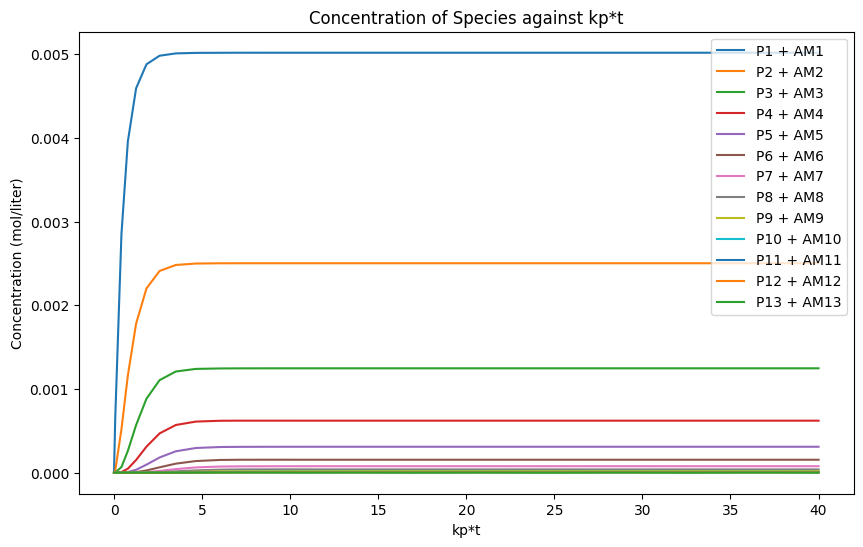

In [10]:
# Plot species concentrations against kp*t

### BEGIN SOLUTION ###
plt.figure(figsize=(10, 6))

#plotting concentration AMj + Pj against time
for idx, species in enumerate(species_data):
    plt.plot(solution.t * kp, species, label=f"P{idx + 1} + AM{idx + 1}")

plt.savefig('Concentration of Species against kp*t', dpi=300)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.xlabel('kp*t')
plt.ylabel('Concentration (mol/liter)')
plt.title('Concentration of Species against kp*t')
plt.legend()
plt.show()
### END SOLUTION ###

###3.4 Analysis
What trends do you see from the graph?. Give 3 bullet points

**Answer**
- The concentration of the species goes to a plateu after a while.
- The highest concentration is AM1 and P1
- It initially increase up until kp*t = 5.0 before it plateus

## 4. Discussion 1: varying kt and kp

What happens if we change kp to 0.5 and kt to 0 (no termination)? Copy the code from above and solve the solution problem and store in variable name: solution2

In [11]:
# Parameters

### BEGIN SOLUTON ###
kp2 = 0.5
kt2 = 0
### END SOLUTION ###

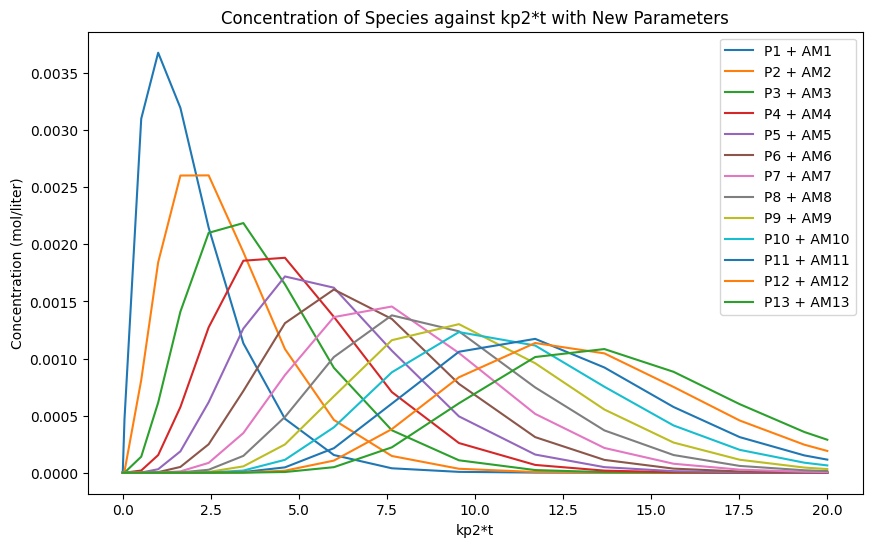

In [12]:
# Solve the ODEs using the new parameters kp2 and kt2

### BEGIN SOLUTION ###
solution2 = solve_ivp(
    lambda t, y: reaction_system(t, y, kp2, kt2),
    t_span,
    initial_conditions,
    method='RK45'
)
### END SOLUTION ###

# Extract AM1 to AM13 and P1 to P13 data
species_data2 = solution2.y[2:15] + solution2.y[15:]

# Plotting the results with new parameters
plt.figure(figsize=(10, 6))
for idx, species in enumerate(species_data2):
    plt.plot(solution2.t * kp2, species, label=f"P{idx + 1} + AM{idx + 1}")

plt.xlabel('kp2*t')
plt.ylabel('Concentration (mol/liter)')
plt.title('Concentration of Species against kp2*t with New Parameters')
plt.legend()
plt.savefig('Concentration of Species against kp2*t with New Parameters', dpi=300)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.show()

What trend do you see from the graph? How does it compare to when kt is not = 0?

**Answer**
- Instead of plateuing, the concentration of each species goes down after the maximum point
- The peak of each species goes down from AM1 to AM13; meaning that the Max concentration of each species lowers as the polymer chains becomes longer, which is expected

##5. Discussion 2: Residual Analysis

###5.1 Making synthetic data

To make a synthetic experimental data, we will introduce an error of the form

$$\text{noisy_data} = \text{species_data} + \mathcal{N}(0, \sigma^2)$$

 This will be a "noise" that is introduced to the data; which will resemble the data that we would get when doing the experiments in lab. Code how you'll introduce the noise to the data. We will use normal distribution of random variables to introduce the errors

In [13]:
# Extract AM1 to AM13 data
am_data = solution.y[2:5]  + solution.y[15:18]

### BEGIN SOLUTION ###

# Generate noisy data
noise_scale = 0.0003  # Adjust the scale of the noise
noisy_data = am_data + np.random.normal(0, noise_scale, am_data.shape)

### END SOLUTION ###

Plot the noisy data up until AM3.

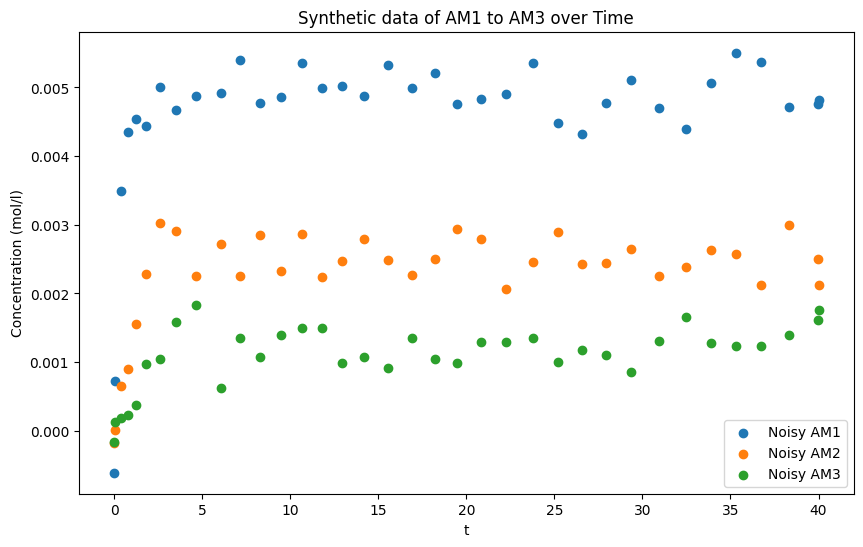

In [14]:
# Plotting the results with noise
plt.figure(figsize=(10, 6))
for idx, species in enumerate(noisy_data):
    plt.scatter(solution.t, species, label=f"Noisy AM{idx + 1}")
plt.xlabel('t')
plt.ylabel('Concentration (mol/l)')
plt.title('Synthetic data of AM1 to AM3 over Time')
plt.legend()
plt.savefig('Synthetic data of AM1 to AM3 over Time', dpi=300)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.show()

###5.2 Residual plot

Next, we will compare the synthetic experimental data against our numerical solution. We will use statistical analysis to do this

Plot the residual of the noisy data and the numerical solution

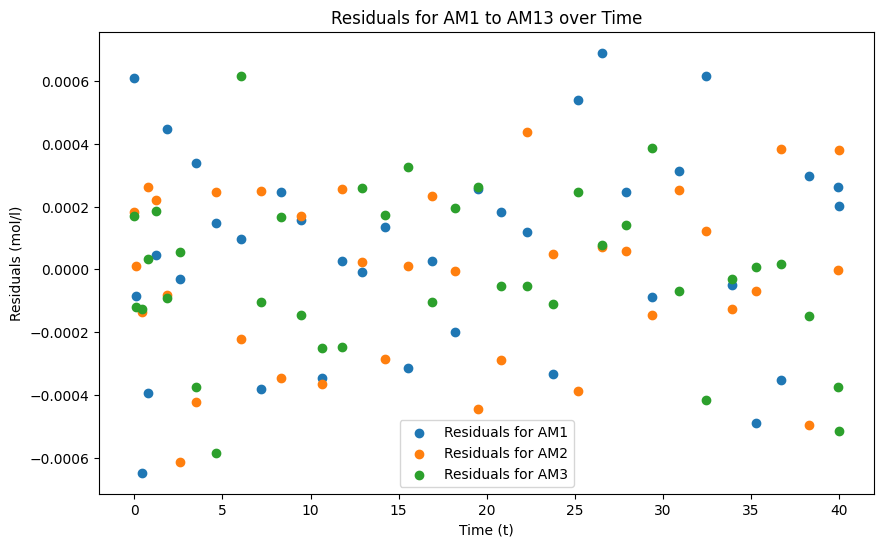

In [15]:
### BEGIN SOLUTION ###
residuals = am_data - noisy_data
### END SOLUTION ###

# Plotting the residuals
plt.figure(figsize=(10, 6))
for idx, species in enumerate(residuals):
    plt.scatter(solution.t, species, label=f"Residuals for AM{idx + 1}")

plt.xlabel('Time (t)')
plt.ylabel('Residuals (mol/l)')
plt.title('Residuals for AM1 to AM13 over Time')
plt.legend()
plt.savefig('Residuals for AM1 to AM13 over Time', dpi=300)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.show()

###5.3 Statistics of the residual
Calculate the mean, variance, and the standard deviation of the residuals

In [16]:
### BEGIN SOLUTION ###
# Calculate mean, variance, and standard deviation for each AM
for idx, species_residual in enumerate(residuals):
    mean_residual = np.mean(species_residual)
    variance_residual = np.var(species_residual)
    std_dev_residual = np.std(species_residual)

    print(f"AM{idx + 1} Residuals - Mean: {mean_residual}, Variance: {variance_residual}, Standard Deviation: {std_dev_residual}")
### END SOLUTION ###
# [Plotting code section]

AM1 Residuals - Mean: 6.328250532088572e-05, Variance: 1.0477972340038783e-07, Standard Deviation: 0.0003236969622971273
AM2 Residuals - Mean: -2.2542973936612587e-05, Variance: 7.410850084967498e-08, Standard Deviation: 0.00027222876565432055
AM3 Residuals - Mean: -1.6880629626695078e-05, Variance: 6.464325789427053e-08, Standard Deviation: 0.0002542503842558955


Describe the differences between AM1,AM2, and AM3 residuals


**Answer**

AM2 has the smallest mean,
AM3 has the smallest variance,
AM3 has the smallest STD

##6. Discussion 3: Perform a non-linear Regression analysis

We will use a non-linear regression to solve for kp and kt of the data based on AM1 - AM3 noisy data and the numerical solution model.

We will use the equation

$$\min_{\hat{\theta}} \quad \sum (y_i - \hat{y}_i)^2$$

where

$$\theta = [k_{p}, k_m]$$

Define a function that will call the numerical solution

In [17]:
def model_func(theta, t_points):
    '''
    Function to define the reaction system for polymerization

    Arguments:
        theta: kp and km
    Returns:
        qhat: the numerical solution

    '''

    ### BEGIN SOLUTION ###

    #lumping kp and kt into theta
    kp, kt = theta

    #defining the solution of kp and kt
    solution = solve_ivp(
        lambda t, y: reaction_system(t, y, kp, kt),
        t_span,
        initial_conditions,
        method='RK45',
        t_eval=t_points
    )
    qhat = solution.y[2:5, :] + solution.y[15:18, :]

    ### END SOLUTION ###

    return qhat.flatten()


Define a function that will return the residuals

In [18]:
def regression_func(theta, t_points, noisy_data):
    '''
    Function to define the residuals

    Arguments:
        theta: kp and km
        t_points: time points
        noisy_data: synthetic experimental data
    Returns:
        residuals

    '''
    ### BEGIN SOLUTION ###
    qhat = model_func(theta, t_points)
    ### END SOLUTION ###
    return qhat - noisy_data.flatten()



Perform a non-linear regression using least squares method built-in scipy

In [19]:
# Initial guess for kp and kt
theta_guess = ([0.5, 0.1])

# Time points for the model to solve at (should match the time points of noisy_data)
t_points = np.linspace(t_span[0], t_span[1], len(noisy_data[0]))


### BEGIN SOLUTION ###
# Perform the least squares optimization
result = least_squares(
    fun=regression_func,
    x0=theta_guess,
    args=(t_points, noisy_data),
    method='lm'  # Levenberg-Marquardt algorithm, you can choose other methods as needed
)
### END SOLUTION ###

# Extract optimized parameters
optimized_kp, optimized_kt = result.x

# Print the results
print(f"Optimized kp: {optimized_kp}, Optimized kt: {optimized_kt}")

print('kp/kt =', optimized_kp/optimized_kt)

Optimized kp: 0.2510900921603164, Optimized kt: 0.24160040311498165
kp/kt = 1.039278448723525


**Conclusion (Write one or 2 sentence)**

Based on the result, the kp and kt ratio is the same compared to the numerical solution (kp/kt = 1). However, due to the noise, it cannot precisely get kp and kt; which is expected

Plot the predicted data against the noisy data

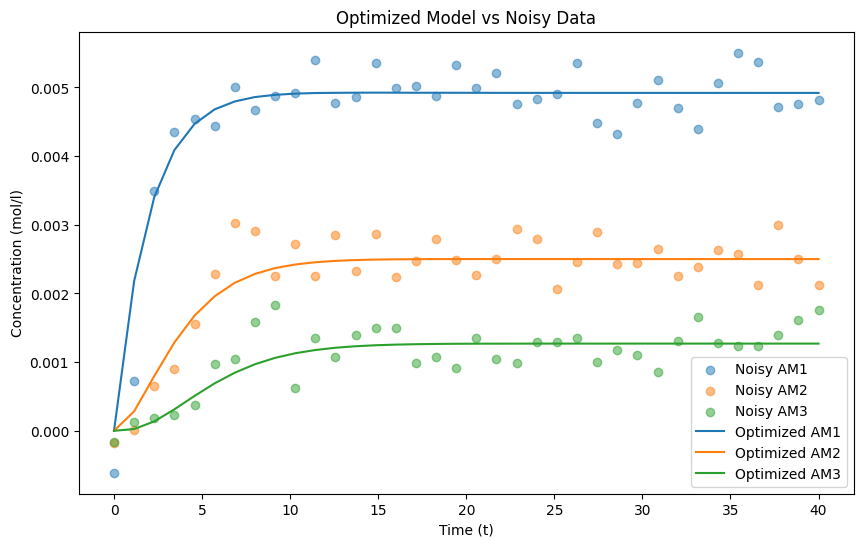

kp/kt = 1.039278448723525


In [20]:
import matplotlib.pyplot as plt

# Generate model predictions using the optimized parameters
optimized_predictions = model_func([optimized_kp, optimized_kt], t_points).reshape(-1, len(t_points))

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot noisy data
for idx, species in enumerate(noisy_data):
    plt.scatter(t_points, species, label=f"Noisy AM{idx + 1}", alpha=0.5)

# Plot optimized model predictions
for idx, species in enumerate(optimized_predictions):
    plt.plot(t_points, species, label=f"Optimized AM{idx + 1}")

plt.xlabel('Time (t)')
plt.ylabel('Concentration (mol/l)')
plt.title('Optimized Model vs Noisy Data')
plt.legend()
plt.savefig('Optimized Model vs Noisy Data', dpi=300)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.show()

# Print the ratio of optimized kp to kt
print(f"kp/kt = {optimized_kp / optimized_kt}")


##7. Discussion 4: Uncertainty Analysis

Our goal is to get the covariance matrix. To achieve this, we will use

$$
\Sigma_{\theta} \approx \hat{\sigma}_e^2 (J^T J)^{-1}
$$

where $J$ is the Jacobian of the residuals w.r.t. $\theta$:

$$
J_{i,j} = \frac{\partial(y_i - \hat{y}_i)}{\partial \theta_j}
$$

Print the jacobian matrix

In [21]:
#printing the jacobian matrix
J = result.jac
print('J= ',J)

J=  [[ 0.00000000e+00  0.00000000e+00]
 [ 6.30880931e-03  1.10213758e-04]
 [ 6.58007922e-03  6.29269267e-04]
 [ 4.54771618e-03  1.53636467e-03]
 [ 1.90845146e-03  2.66444683e-03]
 [-6.35091992e-04  3.84344561e-03]
 [-2.76518688e-03  4.98763922e-03]
 [-4.51535723e-03  5.99873954e-03]
 [-5.88607362e-03  6.87342000e-03]
 [-6.86873628e-03  7.61934516e-03]
 [-7.68980946e-03  8.20278473e-03]
 [-8.27905898e-03  8.68312408e-03]
 [-8.66643597e-03  9.07521381e-03]
 [-9.01211802e-03  9.36445187e-03]
 [-9.28002138e-03  9.58755191e-03]
 [-9.42842647e-03  9.77361061e-03]
 [-9.54685315e-03  9.91377165e-03]
 [-9.66003697e-03  1.00147705e-02]
 [-9.75128385e-03  1.00891159e-02]
 [-9.80491093e-03  1.01481199e-02]
 [-9.81830221e-03  1.01994427e-02]
 [-9.85197085e-03  1.02332759e-02]
 [-9.88175242e-03  1.02576198e-02]
 [-9.90342372e-03  1.02765561e-02]
 [-9.91142595e-03  1.02940720e-02]
 [-9.91860557e-03  1.03060810e-02]
 [-9.92711941e-03  1.03138108e-02]
 [-9.93347319e-03  1.03196160e-02]
 [-9.93679156e-0

Calculate the residual between the linear regression model and the noisy data and the variance

In [22]:
### BEGIN SOLUTION ###

r3= noisy_data.flatten() - model_func([optimized_kp, optimized_kt], t_points)
var_r3 = np.var(r3)

print('Variance of r = ',var_r3, 'mol/L')

### END SOLUTION ###

Variance of r =  1.0611545634820738e-07 mol/L


Find the covariance matrix

In [34]:
cov_matrix = var_r3 * np.linalg.inv(np.dot(J.T, J))

print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[0.00029574 0.00028716]
 [0.00028716 0.00031395]]


**Conclusion**

The code exemplifies Python's versatility by simulating addition polymerization with ODEs, visualizing species concentrations over time, and elucidating reaction kinetics dynamics. Leveraging NumPy, SciPy, and Matplotlib, it facilitates precise parameter estimation for kp and kt, revealing uncertainties and parameter interdependencies through the covariance matrix. This comprehensive approach emphasizes the need for cautious interpretation, highlighting correlations between parameters for informed chemical system analyses and predictions. The off-diagonals are non-zero, therefore there must be a variation between both of the parameters